In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading dataset

In [4]:
url = 'https://raw.githubusercontent.com/ruslan16bmstu/ML/main/heart_cleveland_upload.csv'

In [5]:
df = pd.read_csv(url)

# Description

In [6]:
df.shape

(297, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


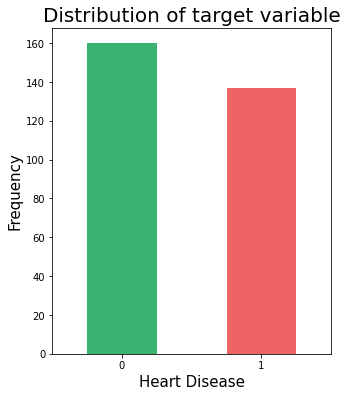

In [11]:
df['condition'].value_counts().plot(kind="bar",figsize=(5,6),color=['#3CB371','#EE6363'])
plt.title('Distribution of target variable',fontsize=20)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(rotation=0)
plt.show()

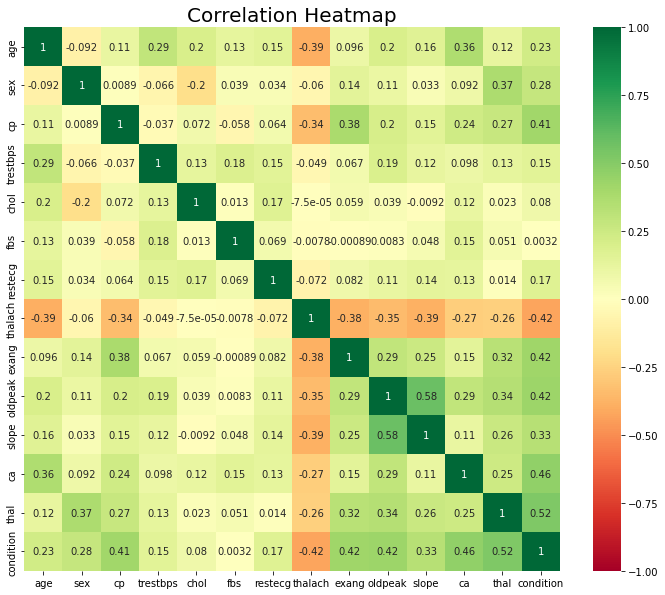

In [12]:
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap="RdYlGn")
plt.title("Correlation Heatmap",fontsize=20)
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

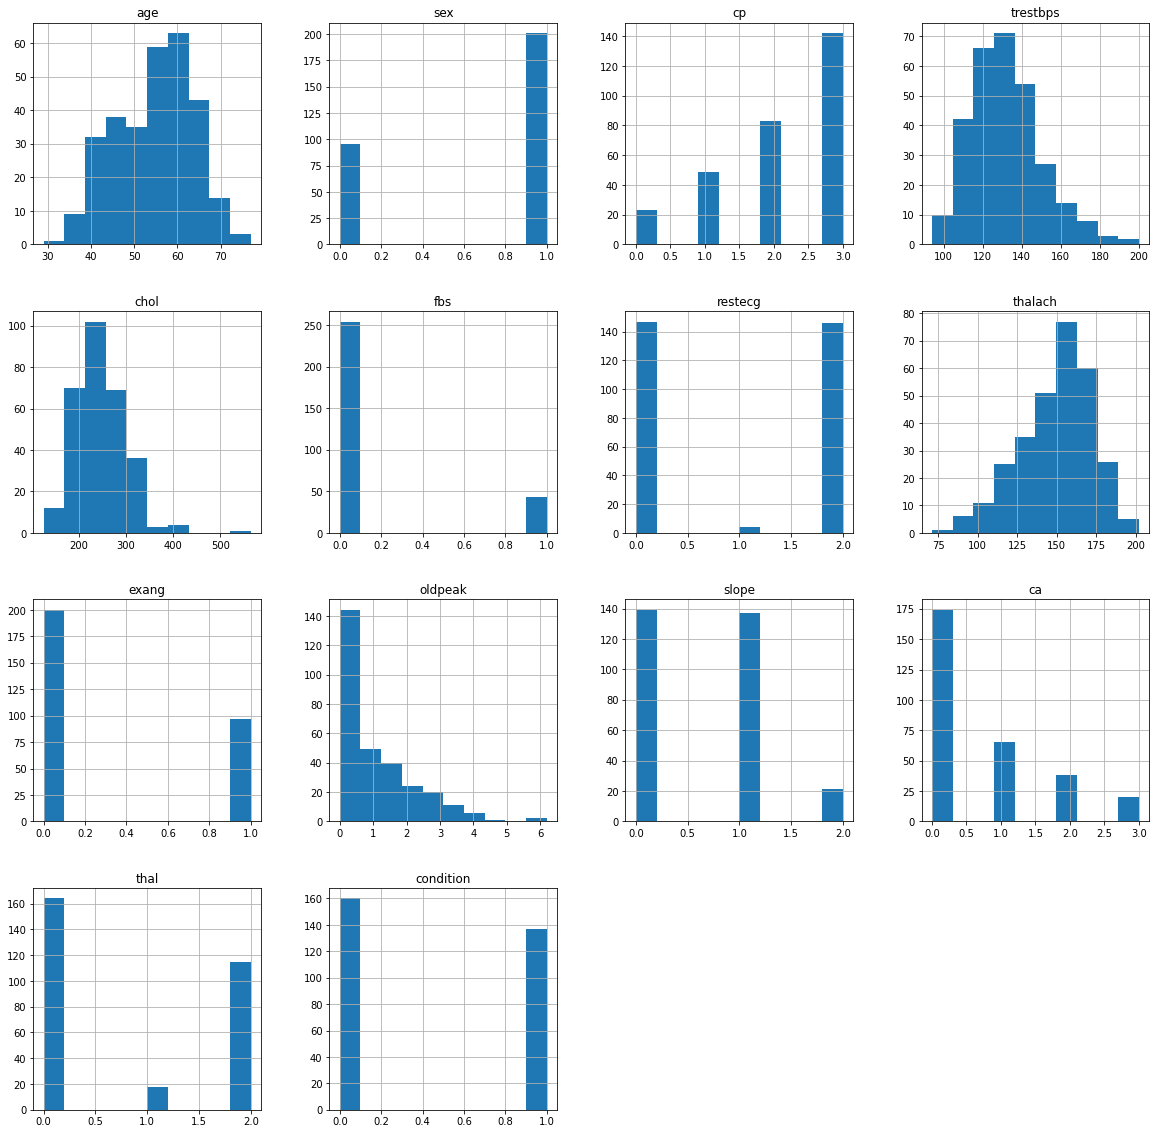

In [14]:
df.hist(figsize=(20, 20))

# Data preprocessing

In [15]:
scale_list = ['age', 'trestbps', 'chol', 'oldpeak']
ohe_list = ['cp', 'restecg', 'slope', 'ca', 'thal']

transformer = ColumnTransformer([
    ("default", "passthrough", ['sex', 'fbs', 'exang']),
    ("min_max", MinMaxScaler(), scale_list),
    ("ohe", OneHotEncoder(sparse=False), ohe_list)
                                ])

In [16]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['condition'])

In [17]:
y_train = X_train['condition']
y_test = X_test['condition']

In [18]:
X_train = X_train.drop(labels='condition', axis=1)
X_test = X_test.drop(labels='condition', axis=1)

# Model training

In [19]:
logreg = Pipeline([
    ("transform", transformer),
    ("log_reg", LogisticRegression(class_weight={0: 0.3, 1: 0.7}, random_state=42))
])

In [20]:
busting = Pipeline([
    ("transform", transformer),
    ("log_reg", GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=42))
])

In [21]:
logreg.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('default', 'passthrough',
                                                  ['sex', 'fbs', 'exang']),
                                                 ('min_max', MinMaxScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'oldpeak']),
                                                 ('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  ['cp', 'restecg', 'slope',
                                                   'ca', 'thal'])])),
                ('log_reg',
                 LogisticRegression(class_weight={0: 0.3, 1: 0.7},
                                    random_state=42))])

In [22]:
busting.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('default', 'passthrough',
                                                  ['sex', 'fbs', 'exang']),
                                                 ('min_max', MinMaxScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'oldpeak']),
                                                 ('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  ['cp', 'restecg', 'slope',
                                                   'ca', 'thal'])])),
                ('log_reg',
                 GradientBoostingClassifier(max_depth=6, random_state=42))])

# Model prediction

### LogisticRegression

In [23]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.90      0.96      0.93        28

    accuracy                           0.93        60
   macro avg       0.93      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60



In [24]:
cm = confusion_matrix(y_test, y_pred)

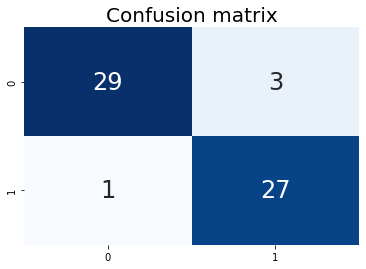

In [25]:
plt.figure()
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})
plt.title("Confusion matrix",fontsize=20)
plt.show()

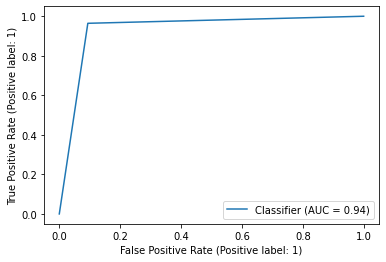

In [32]:
RocCurveDisplay.from_predictions(y_test, y_pred)

### GradientBoostingClassifier

In [33]:
y_pred = busting.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.91      0.75      0.82        28

    accuracy                           0.85        60
   macro avg       0.86      0.84      0.85        60
weighted avg       0.86      0.85      0.85        60



In [34]:
cm = confusion_matrix(y_test, y_pred)

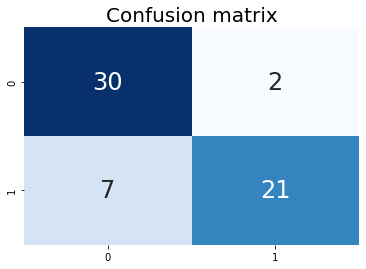

In [35]:
plt.figure()
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})
plt.title("Confusion matrix",fontsize=20)
plt.show()

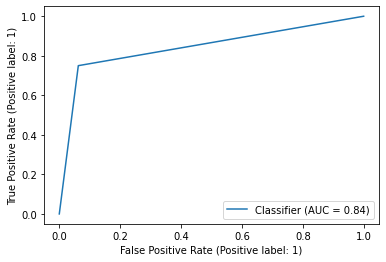

In [36]:
RocCurveDisplay.from_predictions(y_test, y_pred)